# Transient Arctic modeling

## Model configuration - Processes considered

<img src='image/fullxml.png' width='768' height='200' alt='transient configuration' align='center' />

## Column model



|Soil layer                                                        |Peat|Mineral|Bedrock|
|:-----------------------------------------------------------------|:--:|:--:|:-----:|
|Depth from surface                                                         |0.3 m |20 m |40 m  |
|Cell size                                                         |0.01 m |0.01 m |0.01 m  |
|Porosity                                                          |6.3739496E-01 |4.8103077E-01|0.3 |
|Permeability ($\mathrm{m}^2$)                                     |1e-07|1e-08|1e-09|
|Van Genuchten $\alpha$ (Pa$^{-1}$)                                |1.0000000E-02|1.8249144E-03|0.03|
|Van Genuchten n                                                   |2.0500000E+00|2.0500000E+00|2|
|Residual saturation                                               |2.2432414E-01|1.5948806E-01|0.05|
|Thermal conductivity, unfrozen ($\mathrm{Wm}^{-1}\mathrm{K}^{-1}$)|4.3957661E-01|9.5210506E-01|1|
|Thermal conductivity, dry ($\mathrm{Wm}^{-1}\mathrm{K}^{-1}$)     |1.0102341E-01|9.8440543E-01|0.29|



## Model setup – initialization

freeze.xml
* The purpose is to freeze a soil column from bottom to top to obtain an initial frozen soil domain.
* The freeze-up model has the same configuration with demo 1.
* Initial water table depth = -5.78m
* Run for a long time to reach steady state (1000 years)
* Obtain the final pressure and temperature profile using ATS tool **column_data.py**

- <font color='red'>Do we conduct a similar spin-up process?</font>

## Model setup – transient 

* cycle driver
  - Basic configuration
  - Run for 1 year
* subsurface flow
  - Initial condition: hydrostatic head = -1 m (Original - from freezeup)
  - Boundary condition: J$_\mathrm{w}$ = 0 [Neumann boundary - No hydraulic flow at the surfaces - Prep and Evap. is going to be added using SEB]
* surface flow
  - Initial condition: from subsurface
  - Boundary condition: outlet at surface; (if hillslope, would be possible define the lower side as outlet)
* subsurface energy
  - Initial condition: T = 270.15 K
  - Boundary condition: J$_\mathrm{e}$ = 0
* surface energy
  - Initial condition: from subsurface
  - Boundary condition: J$_\mathrm{e}$ = 0
* SEB
  - Initial condition: snow depth, could be from the last step of spinup (We need to rethink this value - Can we assign the value from Yakou data?

## SEB conditions 

- **SEB with Snow considered - Daily data considered**
- Surface-air_temperature 
- Surface-incoming_shortwave_radiation 
- Surface-relative_humidity 
- Surface precipitation_rain
- Surface-snow-precipitation: This data needs to be rethought - As it is taking greater simulation time. Actual data, constant data (from 50 - 200 days),... have been tried.  

- Land cover types (Rethink the values - Is it fix?): Dessicated zone thickness (m) = 0.1 m, Roughness length of bare ground (m) = 0.04, Roughness length of snow (m) = 0.004, Snow transition depth (m) = 0.02, Water transition depth (m) = 0.001, albedo of bare ground (-) = 0.135, Emissivity of bare ground (-) = 0.92.

- Do we need to define minimum wind speed? - Check out: https://amanzi.github.io/ats/input_spec/ATSNativeSpec_1_1.html#id168

## Observation

We add **observation** in this model input file.
It is used for collecting some specific modeled results (variables/parameters) 
probably at some specific locations with time. Locations are defined in **region**.  

* Observations points considered: 0.01, 0.04, 0.2, 0.4, 0.8, 1.2, 6, 5.0, 10.0, 20.0, 30.0, 40.0 m & surface outlet (Region: boundary - It includes all the entities on the boundary face! - How is it defined?).

# Model observation

In [1]:
%matplotlib inline
import sys, os
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import sys,os
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

In [3]:
import os
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [4]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colors
import matplotlib.cm
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [5]:
#### Extracting the measured data
Yakou_measured_data = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv', sep='\t',index_col='TIMESTAMP')
Yakou_measured_data.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [6]:
# Calculating the temperature in Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

times = np.arange(1, time_values+1, 1)

# Adding column information:


x = 0
for i, depth in enumerate(depths):
        Yakou_measured_data[f'Soil temperature at - {depth} m (K)'] = Yakou_measured_data[f'Soil temperature at - {depth} m (°C)'] + 273.15

Yakou_measured_data['Soil temperature at - 0.04 m (K)'].head()

TIMESTAMP
2016-01-01    260.642153
2016-01-02    261.288403
2016-01-03    261.325486
2016-01-04    261.152153
2016-01-05    260.778403
Name: Soil temperature at - 0.04 m (K), dtype: float64

In [7]:
Yakou_measured_data.index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', name='TIMESTAMP', length=1096)

In [8]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat = 6.3739496E-01

poro_mineral = 4.8103077E-01

for i, depth in enumerate(depths):
    if depth < depth_peat:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

### Our data

In [9]:
z = np.arange(0,365)
len(z)

365

In [29]:
with h5py.File(f'/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_InputData_4yrs/Calib_data_2016_2018.h5','r') as hdf:
    # List of variables - copied from AWS_final_metdata_4yrs_concise
    ls = ['air temperature [K]', 'Soil temperature at - 0.00 m [K]',
       'Wind speed at 10 m (m/s)', 'precipitation rain [m s^-1]',
       'Relative humidity at 5 m (%)', 'Incoming shortwave radiation (W/m^2)',
       'precipitation snow [m SWE s^-1]_sd0.1',
       'precipitation snow [m SWE s^-1]_sd0.2',
       'precipitation snow [m SWE s^-1]_sd0.45',
       'precipitation snow [m SWE s^-1]_sd0.04',
       'precipitation snow [m SWE s^-1]_sd0.01']
    print(ls)
    #air_temp_smoothened = np.array(hdf.get('air temperature [K]'))
    #print(air_temp_smoothened)
    z = np.arange(0,1096)
    data_input = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        data_input[f'{i}'] = np.array(hdf.get(f'{i}'))
        
#data_input['time [days]'] = data_input['time [s]']/86400        
#data_input.index = data_input['time [days]']

#data_input['Air temperature [°C]'] = data_input['air temperature [K]'] - 273.15
data_input.head()

['air temperature [K]', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m/s)', 'precipitation rain [m s^-1]', 'Relative humidity at 5 m (%)', 'Incoming shortwave radiation (W/m^2)', 'precipitation snow [m SWE s^-1]_sd0.1', 'precipitation snow [m SWE s^-1]_sd0.2', 'precipitation snow [m SWE s^-1]_sd0.45', 'precipitation snow [m SWE s^-1]_sd0.04', 'precipitation snow [m SWE s^-1]_sd0.01']


,air temperature [K],Soil temperature at - 0.00 m [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1]_sd0.1,precipitation snow [m SWE s^-1]_sd0.2,precipitation snow [m SWE s^-1]_sd0.45,precipitation snow [m SWE s^-1]_sd0.04,precipitation snow [m SWE s^-1]_sd0.01
0,261.261562,260.046042,6.880639,0.0,0.181419,147.702618,4.340278e-10,8.680556e-10,1.953125e-09,1.736111e-10,4.340278e-11
1,262.118340,260.894583,5.634090,0.0,0.243579,140.529160,2.411262e-10,4.822523e-10,1.085068e-09,9.645046e-11,2.411262e-11
2,259.703889,260.412500,4.129521,0.0,0.456374,135.256493,1.446759e-10,2.893519e-10,6.510417e-10,5.787037e-11,1.446759e-11
3,258.583056,260.143403,6.604604,0.0,0.434167,107.868264,5.304780e-10,1.060956e-09,2.387151e-09,2.121912e-10,5.304780e-11
4,259.050764,259.624722,4.566090,0.0,0.298974,148.488174,2.893519e-10,5.787037e-10,1.302083e-09,1.157407e-10,2.893519e-11


In [11]:
#with h5py.File(f'../data_input/Yakou_data_subtemp0cm_2017_sd.h5','r') as hdf:
    #ls = list(hdf.keys())
    #print(ls)
    #air_temp_smoothened = np.array(hdf.get('air temperature [K]'))
    #incoming_SW = np.array(hdf.get('Incoming shortwave radiation (W/m^2)'))
    #rel_humid = np.array(hdf.get('Relative humidity at 5 m (%)'))
    #wind_speed_10m = np.array(hdf.get('Wind speed at 10 m (m/s)'))
    #prep = np.array(hdf.get('precipitation rain [m s^-1]'))
    #snow = np.array(hdf.get('precipitation snow [m SWE s^-1]_0.45'))
    #time = np.array(hdf.get('time [s]'))
    #soil_temp = np.array(hdf.get('Soil temperature at - 0.00 m (K)'))
    #print(air_temp_smoothened)
    #z = np.arange(0,365)
    #data_input_rk = pd.DataFrame()
    
    #print(data_input)
    #for i in ls:
        #print(i)
        #data_input_rk[f'{i}'] = np.array(hdf.get(f'{i}'))
        
#data_input['time [days]'] = data_input['time [s]']/86400        
#data_input.index = data_input['time [days]']

#data_input['Air temperature [°C]'] = data_input['air temperature [K]'] - 273.15
#data_input_rk.head()

In [12]:
Yakou_measured_data.index = pd.to_datetime(Yakou_measured_data.index)

data_input.index = Yakou_measured_data.index

In [13]:
data_input.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=1096, freq=None)

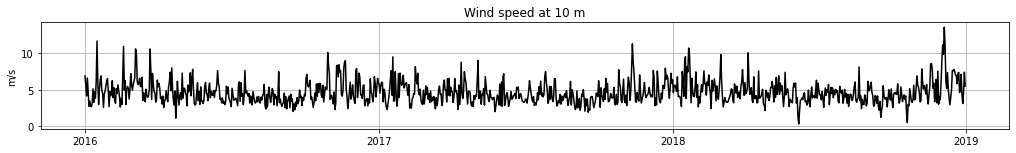

In [14]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])


# Define the date format
date_form = DateFormatter("%Y")


f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.xaxis.set_major_formatter(date_form)
f2_ax1.grid(True)
f2_ax1.xaxis.set_major_locator(dates.YearLocator())

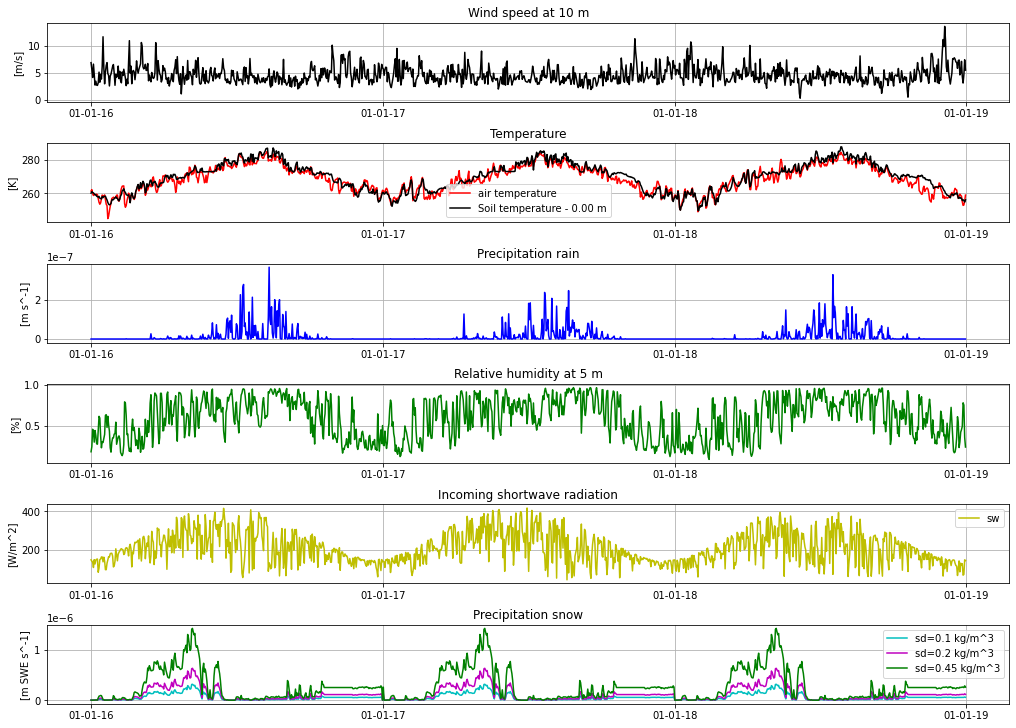

In [15]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

# Define the date format
date_form = DateFormatter("%d-%m-%y")


f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('[m/s]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.xaxis.set_major_formatter(date_form)
f2_ax1.grid(True)
f2_ax1.xaxis.set_major_locator(dates.YearLocator())

f2_ax2.set_title('Temperature')
f2_ax2.plot(data_input['air temperature [K]'], 'r',label='air temperature')
f2_ax2.plot(data_input['Soil temperature at - 0.00 m [K]'], 'k',label='Soil temperature - 0.00 m')
f2_ax2.set_ylabel('[K]')
#f2_ax1.set_xlabel('Date')
f2_ax2.xaxis.set_major_formatter(date_form)
f2_ax2.legend()
f2_ax2.grid(True)
f2_ax2.xaxis.set_major_locator(dates.YearLocator())

f2_ax3.set_title('Precipitation rain')
f2_ax3.plot(data_input['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('[m s^-1]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.xaxis.set_major_formatter(date_form)
f2_ax3.grid(True)
f2_ax3.xaxis.set_major_locator(dates.YearLocator())

f2_ax4.set_title('Relative humidity at 5 m')
f2_ax4.plot(data_input['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('[%]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.xaxis.set_major_formatter(date_form)
f2_ax4.grid(True)
f2_ax4.xaxis.set_major_locator(dates.YearLocator())

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_input['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('[W/m^2]')
#f2_ax1.set_xlabel('Date')
f2_ax5.xaxis.set_major_formatter(date_form)
f2_ax5.legend()
f2_ax5.grid(True)
f2_ax5.xaxis.set_major_locator(dates.YearLocator())

f2_ax6.set_title('Precipitation snow')
#f2_ax5.plot(data_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax6.plot(data_input['precipitation snow [m SWE s^-1]_sd0.1'], 'c',label='sd=0.1 kg/m^3')
f2_ax6.plot(data_input['precipitation snow [m SWE s^-1]_sd0.2'], 'm',label='sd=0.2 kg/m^3')
f2_ax6.plot(data_input['precipitation snow [m SWE s^-1]_sd0.45'], 'g',label='sd=0.45 kg/m^3')
f2_ax6.set_ylabel('[m SWE s^-1]')
#f2_ax1.set_xlabel('Date')
f2_ax6.xaxis.set_major_formatter(date_form)
f2_ax6.legend()
f2_ax6.grid(True)
f2_ax6.xaxis.set_major_locator(dates.YearLocator())

In [16]:
ls

['air temperature [K]',
 'Soil temperature at - 0.00 m [K]',
 'Wind speed at 10 m (m/s)',
 'precipitation rain [m s^-1]',
 'Relative humidity at 5 m (%)',
 'Incoming shortwave radiation (W/m^2)',
 'precipitation snow [m SWE s^-1]_sd0.1',
 'precipitation snow [m SWE s^-1]_sd0.2',
 'precipitation snow [m SWE s^-1]_sd0.45',
 'precipitation snow [m SWE s^-1]_sd0.04',
 'precipitation snow [m SWE s^-1]_sd0.01']

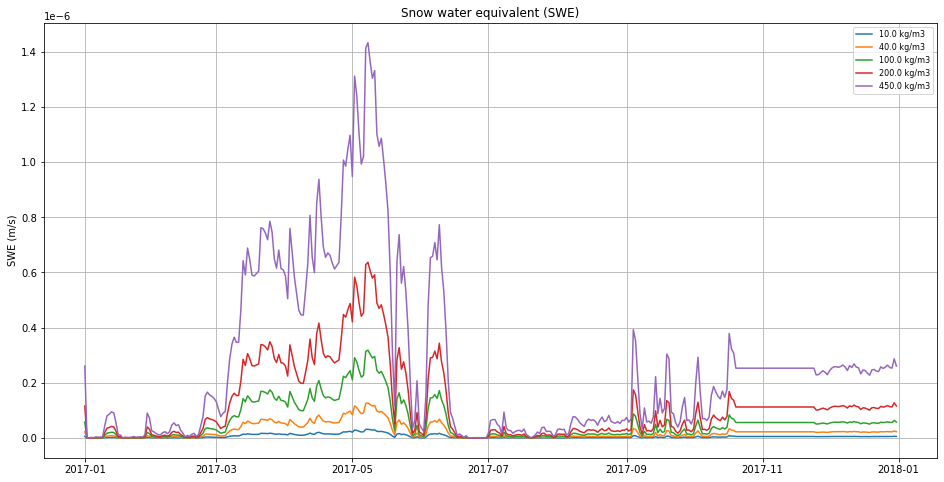

In [17]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(w=16,h=8)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

snow_densities = [0.01, 0.04, 0.1, 0.2, 0.45]

for i, value in enumerate(snow_densities):
    ax1.plot(data_input[f'precipitation snow [m SWE s^-1]_sd{value}']['2017'],label=f'{value*1000} kg/m3')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    

ax1.set_title('Snow water equivalent (SWE)')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
#ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')
ax1.set_ylabel('SWE (m/s)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

### Solution:

#### Comparing all the four results - 

In [18]:
# Storing the data in dataframes

sim_data_sd200 = pd.read_csv('Case5_III_C_glm_aftercalib.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd100 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.1.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd10 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.01.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_sd40 = pd.read_csv('Case5_III_C_calib_3yrs_sd0.04.demo/observation.dat',skiprows=88,sep=' ') 

# Considering simulation results after the initial condition (after the first value)

sim_data_sd10 = sim_data_sd10[1:]
sim_data_sd40 = sim_data_sd40[1:]
sim_data_sd100 = sim_data_sd100[1:]
sim_data_sd200 = sim_data_sd200[1:]

# Changing the index to time series
sim_data_sd10.index = Yakou_measured_data.index
sim_data_sd40.index = Yakou_measured_data.index
sim_data_sd100.index = Yakou_measured_data.index
sim_data_sd200.index = Yakou_measured_data.loc['2017'].index

sim_data_sd40.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,86400.0,269.439951,269.738875,269.928668,270.039606,270.132711,270.147951,270.149673,0.114454,0.114604,0.114710,0.162516,0.162516,0.162517,0.162517
2016-01-02,172800.0,268.369493,269.005538,269.445862,269.738399,270.048951,270.128793,270.144414,0.114037,0.114265,0.114456,0.162514,0.162516,0.162516,0.162517
2016-01-03,259200.0,267.285336,268.173945,268.841418,269.323534,269.903678,270.085882,270.130049,0.113737,0.113975,0.114201,0.162512,0.162515,0.162516,0.162516
2016-01-04,345600.0,265.981254,267.170290,268.094655,268.791824,269.693235,270.012962,270.102157,0.113471,0.113710,0.113952,0.162510,0.162514,0.162516,0.162516
2016-01-05,432000.0,264.187754,265.819251,267.100499,268.084587,269.401677,269.902525,270.055990,0.113205,0.113443,0.113694,0.162508,0.162513,0.162515,0.162516


In [19]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [20]:
sim_data_sd10_v = vwc_calc(sim_data_sd10)
sim_data_sd40_v = vwc_calc(sim_data_sd40)
sim_data_sd100_v = vwc_calc(sim_data_sd100)
sim_data_sd200_v = vwc_calc(sim_data_sd200)

sim_data_sd10_v.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,86400.0,269.439671,269.738723,269.928590,270.039569,270.132706,270.147950,270.149672,0.114454,0.114604,...,0.162516,0.162517,0.162517,7.323676,7.333292,7.340080,7.828732,7.828761,7.828766,7.828767
2016-01-02,172800.0,268.368121,269.004691,269.445360,269.738116,270.048886,270.128780,270.144410,0.114036,0.114265,...,0.162516,0.162516,0.162517,7.296976,7.311592,7.323848,7.828648,7.828735,7.828760,7.828765
2016-01-03,259200.0,267.280434,268.170824,268.839503,269.322413,269.903392,270.085817,270.130031,0.113736,0.113975,...,0.162515,0.162516,0.162516,7.277750,7.293026,7.307490,7.828555,7.828692,7.828746,7.828760
2016-01-04,345600.0,265.972329,267.164205,268.090670,268.789340,269.692506,270.012771,270.102096,0.113469,0.113709,...,0.162514,0.162516,0.162516,7.260701,7.276012,7.291487,7.828462,7.828637,7.828724,7.828751
2016-01-05,432000.0,264.168485,265.806171,267.091907,268.079186,269.400025,269.902061,270.055833,0.113202,0.113441,...,0.162513,0.162515,0.162516,7.243623,7.258868,7.274956,7.828369,7.828570,7.828691,7.828737


Text(0.5, 0, 'Days')

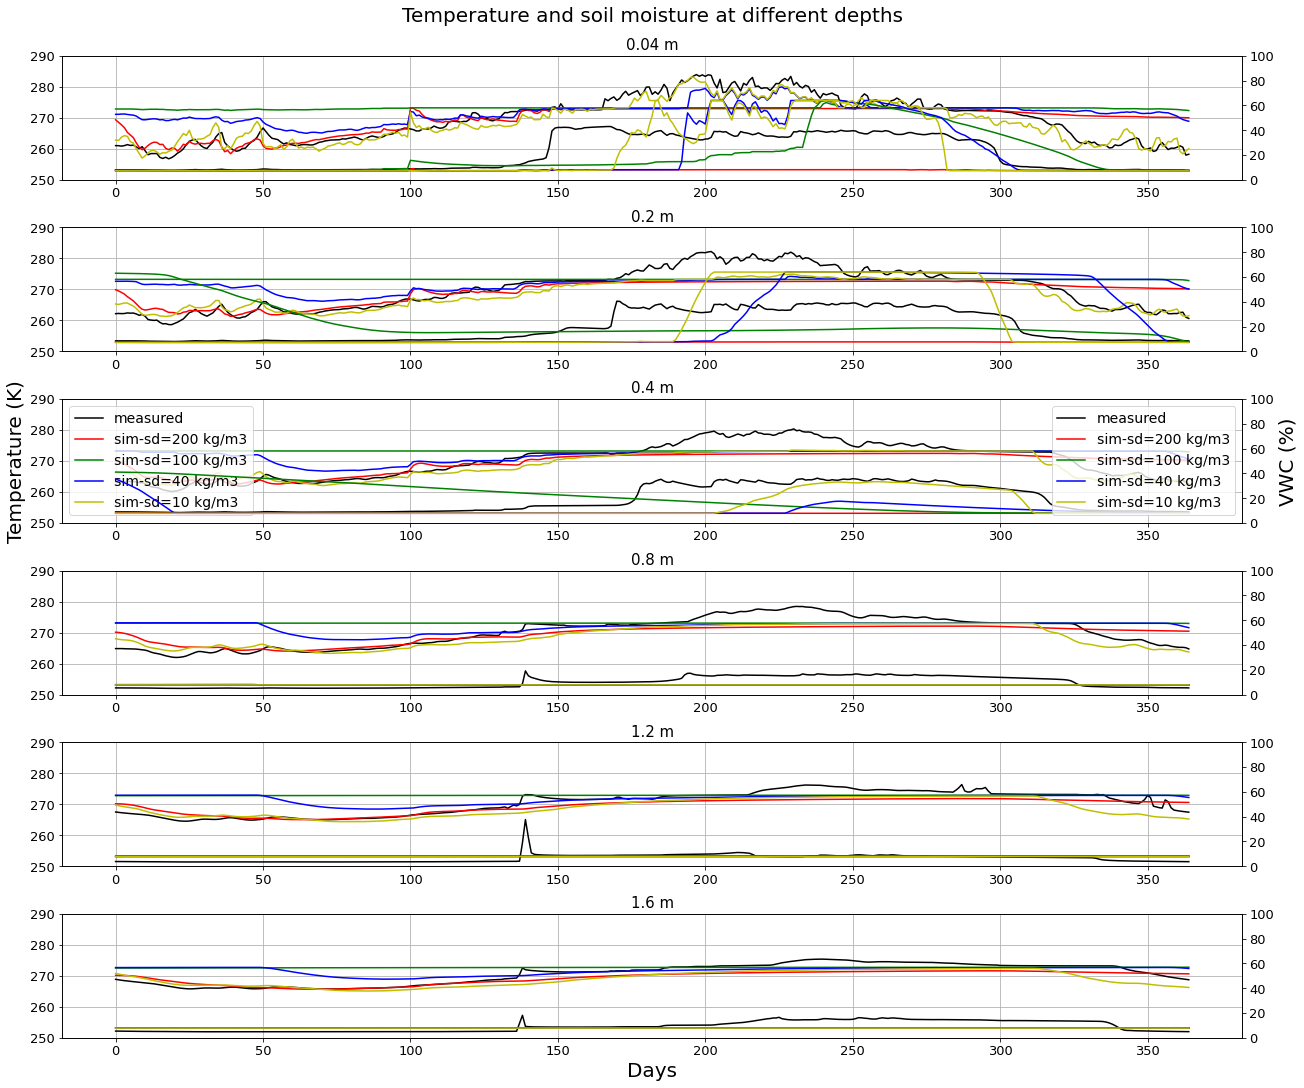

In [21]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'point -{depth} temperature [K]']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    ax2.plot(time_period, sim_data_sd200[f'Soil moisture at - {depth} m (%)']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    ax2.plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    ax2.plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    ax2.plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

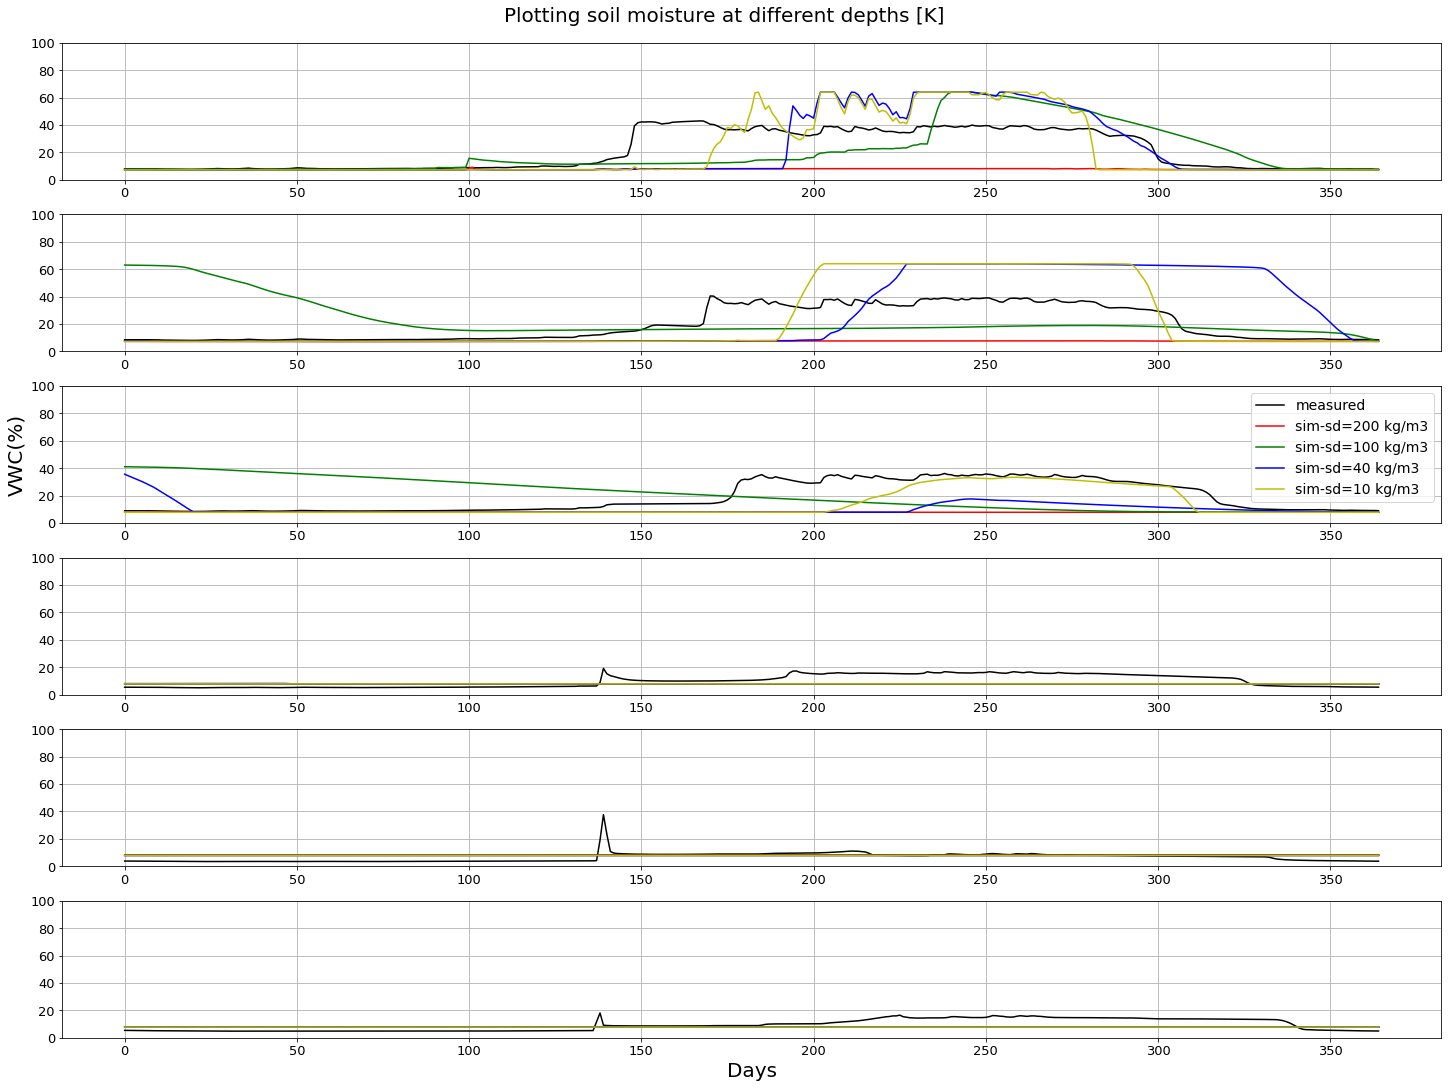

In [22]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'Soil moisture at - {depth} m (%)']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'Soil moisture at - {depth} m (%)']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'Soil moisture at - {depth} m (%)']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'Soil moisture at - {depth} m (%)']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    locals()['f2_ax'+str(j+1)].grid(True)


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('VWC(%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

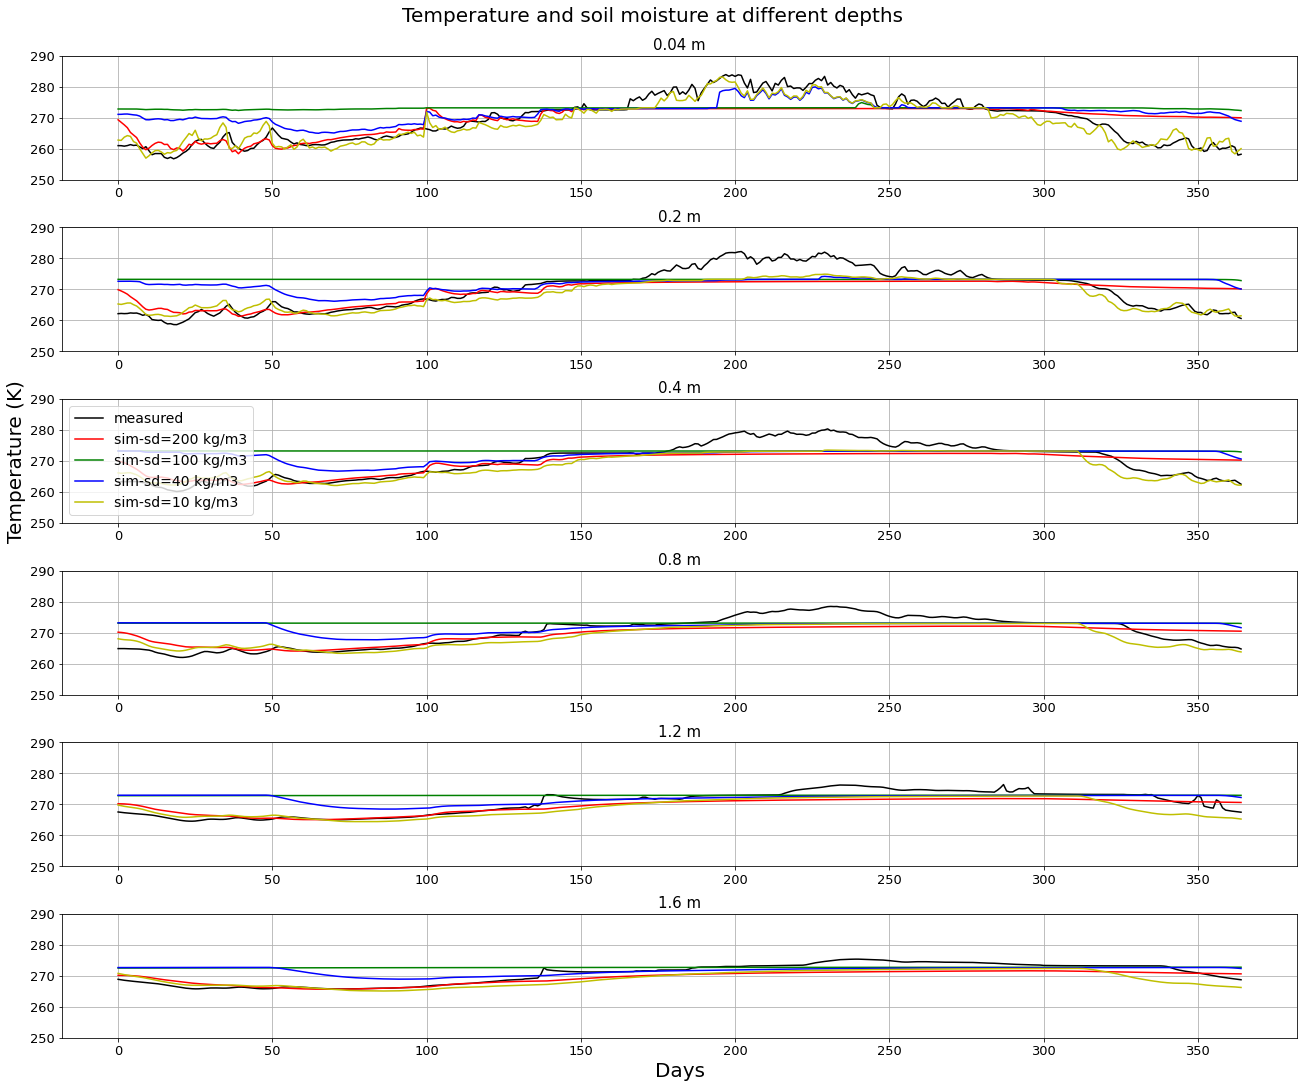

In [23]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2017'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd200[f'point -{depth} temperature [K]']['2017'].values, 'r', label='sim-sd=200 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd100[f'point -{depth} temperature [K]']['2017'].values, 'g', label='sim-sd=100 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd40[f'point -{depth} temperature [K]']['2017'].values, 'b', label='sim-sd=40 kg/m3')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_sd10[f'point -{depth} temperature [K]']['2017'].values, 'y', label='sim-sd=10 kg/m3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

        

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)


f2_ax6.set_xlabel('Days', fontsize=20)

In [24]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [25]:
sim_data = pd.read_csv('Case5_III_C_glm_aftercalib.demo/observation.dat',skiprows=88,sep=' ')
sim_data.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.114846,0.114846,0.114846,0.162517,0.162517,0.162517,0.162517
1,86400.0,269.354756,269.693612,269.905882,270.028870,270.131190,270.147782,270.149647,0.114414,0.114580,0.114697,0.162516,0.162516,0.162517,0.162517
2,172800.0,268.547778,269.101196,269.495265,269.762655,270.053052,270.129424,270.144554,0.114096,0.114304,0.114480,0.162514,0.162516,0.162516,0.162517
3,259200.0,267.725979,268.457257,269.015229,269.424485,269.928339,270.091143,270.131473,0.113848,0.114065,0.114269,0.162513,0.162515,0.162516,0.162516
4,345600.0,266.809187,267.732700,268.461698,269.019737,269.759050,270.029767,270.107357,0.113630,0.113850,0.114067,0.162511,0.162514,0.162516,0.162516


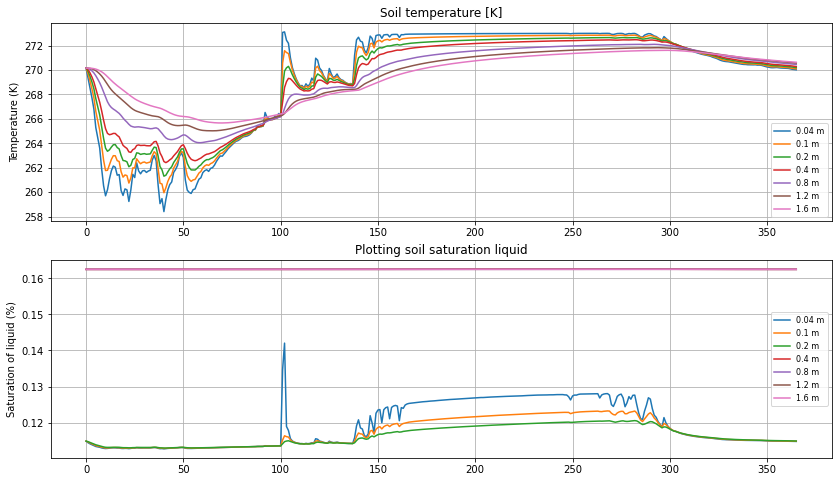

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(w=14,h=8)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(sim_data[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(sim_data[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
#ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')
ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


### Changing the Water table depth 
- to check if the change in water table depth has an influence on the simulation results! - Simulating only for one year!

#### Comparing all the four results - 

In [35]:
sim_data

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.114846,0.114846,0.114846,0.162517,0.162517,0.162517,0.162517
1,86400.0,269.354756,269.693612,269.905882,270.028870,270.131190,270.147782,270.149647,0.114414,0.114580,0.114697,0.162516,0.162516,0.162517,0.162517
2,172800.0,268.547778,269.101196,269.495265,269.762655,270.053052,270.129424,270.144554,0.114096,0.114304,0.114480,0.162514,0.162516,0.162516,0.162517
3,259200.0,267.725979,268.457257,269.015229,269.424485,269.928339,270.091143,270.131473,0.113848,0.114065,0.114269,0.162513,0.162515,0.162516,0.162516
4,345600.0,266.809187,267.732700,268.461698,269.019737,269.759050,270.029767,270.107357,0.113630,0.113850,0.114067,0.162511,0.162514,0.162516,0.162516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,31190400.0,270.126344,270.190528,270.276979,270.358276,270.514750,270.618391,270.676295,0.114831,0.114873,0.114931,0.162518,0.162519,0.162520,0.162521
362,31276800.0,270.086032,270.159820,270.254518,270.340543,270.501007,270.605477,270.663969,0.114805,0.114852,0.114916,0.162518,0.162519,0.162520,0.162521
363,31363200.0,270.053243,270.130323,270.229915,270.320039,270.485943,270.592323,270.651707,0.114785,0.114833,0.114899,0.162518,0.162519,0.162520,0.162521
364,31449600.0,270.033303,270.109135,270.209105,270.300674,270.470313,270.578884,270.639421,0.114772,0.114820,0.114885,0.162518,0.162519,0.162520,0.162521


In [37]:
# Storing the data in dataframes

sim_data_WT10 = pd.read_csv('Case5_WT_1.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_WT15 = pd.read_csv('Case5_WT_15.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_WT25 = pd.read_csv('Case5_WT_25.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_WT05 = pd.read_csv('Case5_WT_05.demo/observation.dat',skiprows=88,sep=' ') 

# Considering simulation results after the initial condition (after the first value)

#sim_data_WT10 = sim_data_WT10[1:]
#sim_data_WT15 = sim_data_WT15[1:]
#sim_data_WT25 = sim_data_WT25[1:]
#sim_data_WT05 = sim_data_WT05[1:]

# Changing the index to time series
sim_data_WT10.index = Yakou_measured_data.loc['2016'].index
sim_data_WT15.index = Yakou_measured_data.loc['2016'].index
sim_data_WT25.index = Yakou_measured_data.loc['2016'].index
sim_data_WT05.index = Yakou_measured_data.loc['2016'].index

sim_data_WT10.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.114846,0.114846,0.114846,0.162517,0.162517,0.162517,0.162517
2016-01-02,86400.0,269.439671,269.738723,269.928590,270.039569,270.132706,270.147950,270.149672,0.114454,0.114604,0.114710,0.162516,0.162516,0.162517,0.162517
2016-01-03,172800.0,268.368121,269.004691,269.445360,269.738116,270.048886,270.128780,270.144410,0.114036,0.114265,0.114456,0.162514,0.162516,0.162516,0.162517
2016-01-04,259200.0,267.280434,268.170824,268.839503,269.322413,269.903392,270.085817,270.130031,0.113736,0.113975,0.114201,0.162512,0.162515,0.162516,0.162516
2016-01-05,345600.0,265.972329,267.164205,268.090670,268.789340,269.692506,270.012771,270.102096,0.113469,0.113709,0.113950,0.162510,0.162514,0.162516,0.162516


In [38]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [39]:
sim_data_WT10_v = vwc_calc(sim_data_WT10)
sim_data_WT15_v = vwc_calc(sim_data_WT15)
sim_data_WT25_v = vwc_calc(sim_data_WT25)
sim_data_WT05_v = vwc_calc(sim_data_WT05)

sim_data_WT10_v.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.114846,0.114846,...,0.162517,0.162517,0.162517,7.348796,7.348796,7.348796,7.828767,7.828767,7.828767,7.828767
2016-01-02,86400.0,269.439671,269.738723,269.928590,270.039569,270.132706,270.147950,270.149672,0.114454,0.114604,...,0.162516,0.162517,0.162517,7.323676,7.333292,7.340080,7.828732,7.828761,7.828766,7.828767
2016-01-03,172800.0,268.368121,269.004691,269.445360,269.738116,270.048886,270.128780,270.144410,0.114036,0.114265,...,0.162516,0.162516,0.162517,7.296976,7.311592,7.323848,7.828648,7.828735,7.828760,7.828765
2016-01-04,259200.0,267.280434,268.170824,268.839503,269.322413,269.903392,270.085817,270.130031,0.113736,0.113975,...,0.162515,0.162516,0.162516,7.277750,7.293026,7.307490,7.828555,7.828692,7.828746,7.828760
2016-01-05,345600.0,265.972329,267.164205,268.090670,268.789340,269.692506,270.012771,270.102096,0.113469,0.113709,...,0.162514,0.162516,0.162516,7.260701,7.276012,7.291487,7.828462,7.828637,7.828724,7.828751


Text(0.5, 0, 'Days')

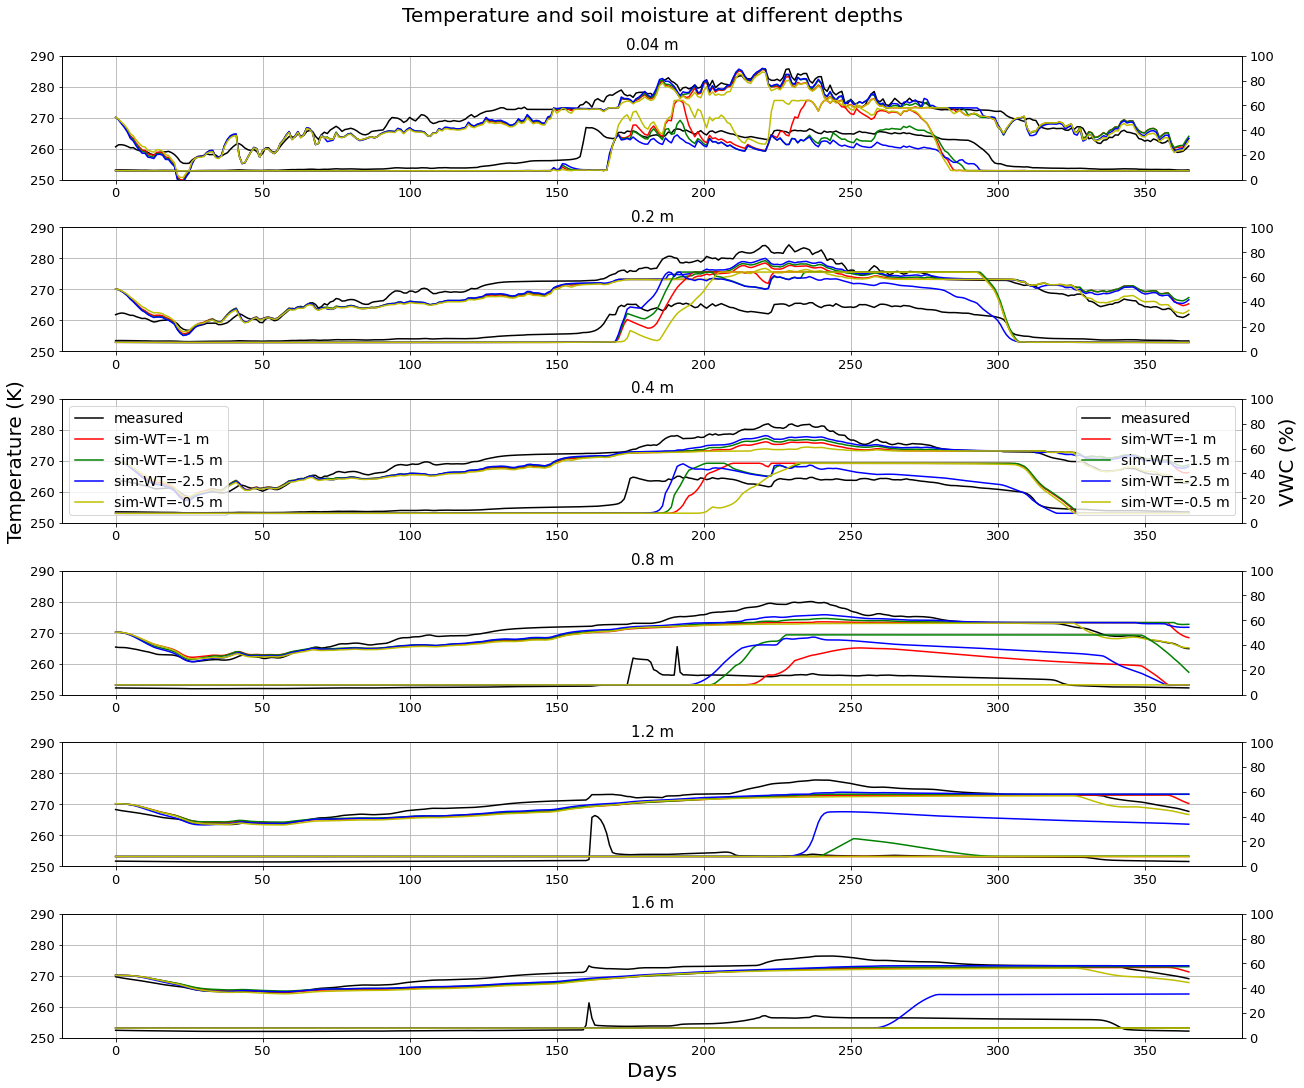

In [43]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,366)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2016'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT10_v[f'point -{depth} temperature [K]']['2016'].values, 'r', label='sim-WT=-1 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT15_v[f'point -{depth} temperature [K]']['2016'].values, 'g', label='sim-WT=-1.5 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT25_v[f'point -{depth} temperature [K]']['2016'].values, 'b', label='sim-WT=-2.5 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT05_v[f'point -{depth} temperature [K]']['2016'].values, 'y', label='sim-WT=-0.5 m')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2016'].values, 'k', label='measured')
    ax2.plot(time_period, sim_data_WT10_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'r', label='sim-WT=-1 m')
    ax2.plot(time_period, sim_data_WT15_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'g', label='sim-WT=-1.5 m')
    ax2.plot(time_period, sim_data_WT25_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'b', label='sim-WT=-2.5 m')
    ax2.plot(time_period, sim_data_WT05_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'y', label='sim-WT=-0.5 m')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

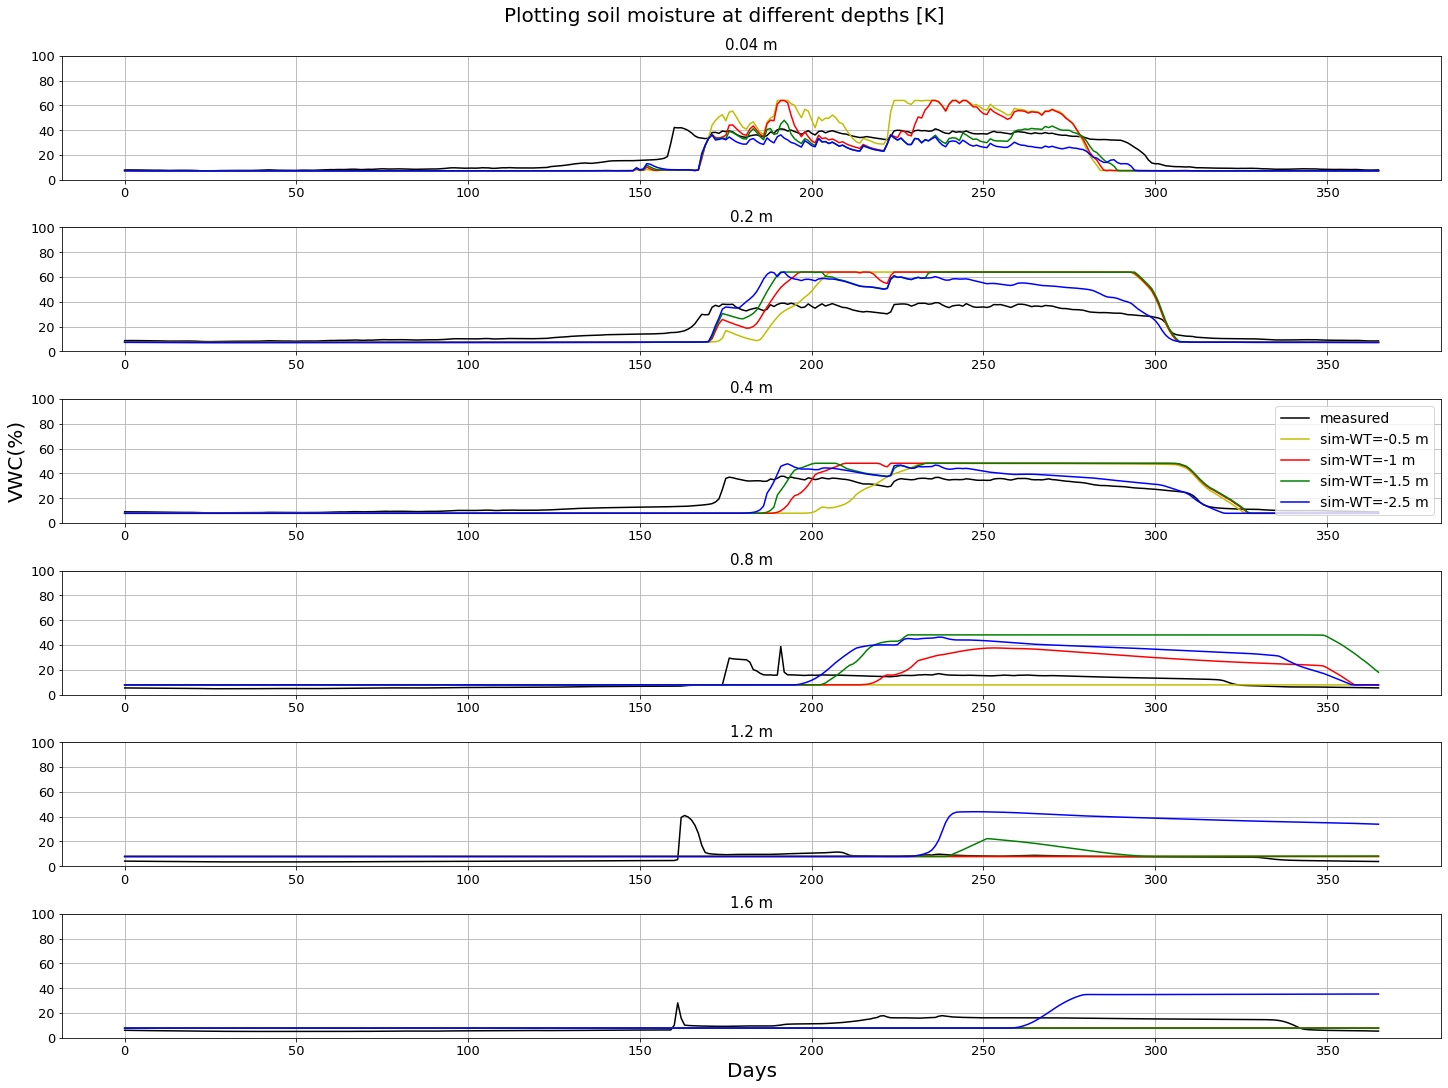

In [47]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,366)
time_period = np.arange(0,366)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2016'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT05_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'y', label='sim-WT=-0.5 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT10_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'r', label='sim-WT=-1 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT15_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'g', label='sim-WT=-1.5 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT25_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'b', label='sim-WT=-2.5 m')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    locals()['f2_ax'+str(j+1)].grid(True)


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('VWC(%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

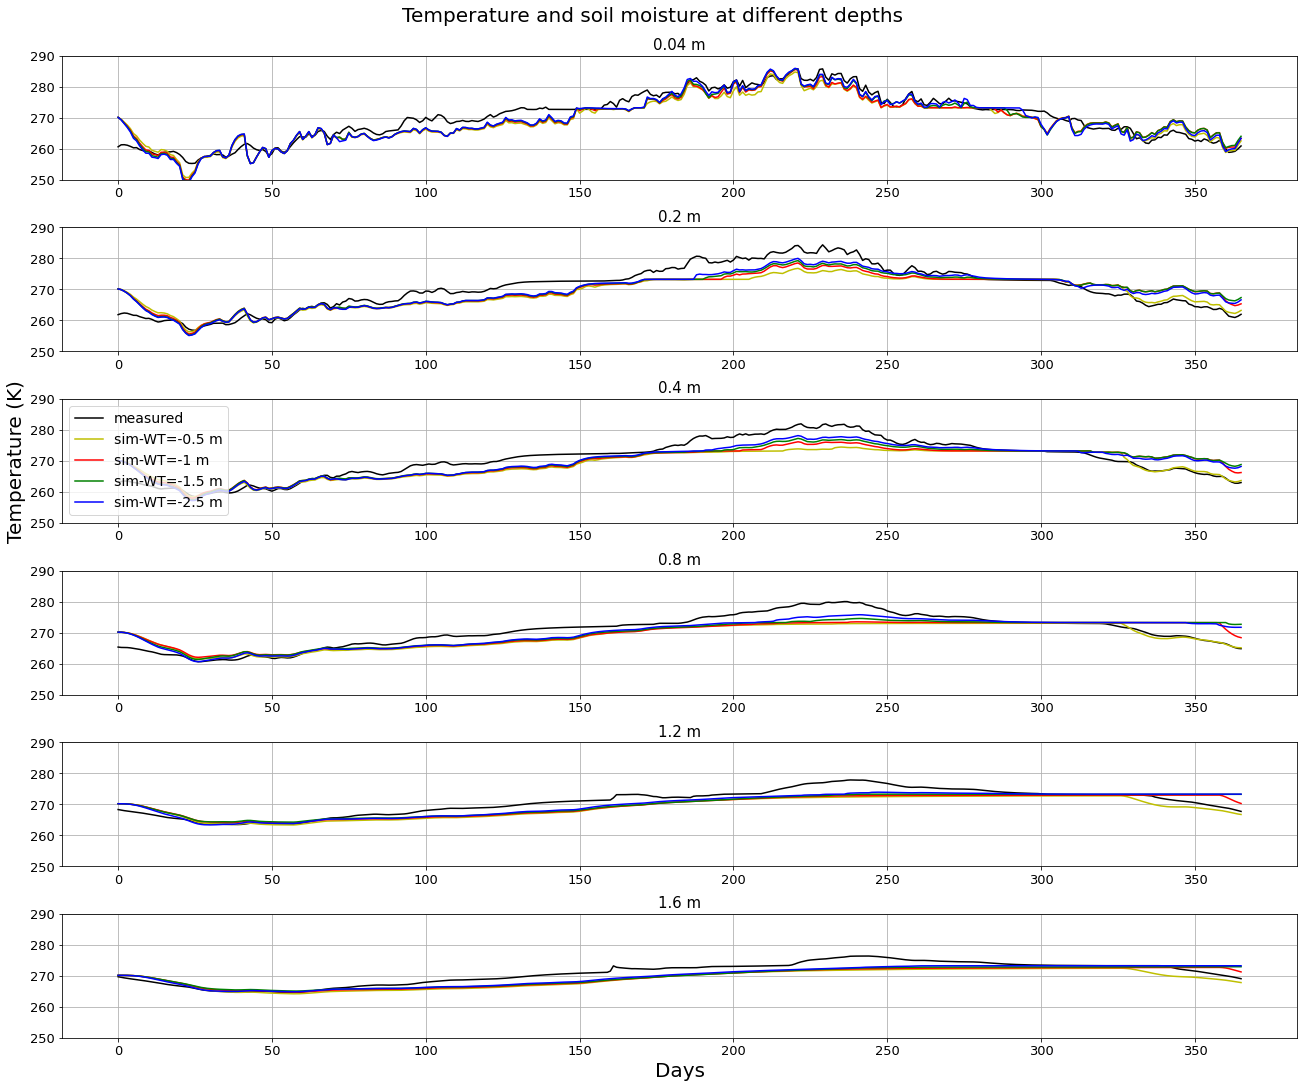

In [48]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,366)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2016'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT05_v[f'point -{depth} temperature [K]']['2016'].values, 'y', label='sim-WT=-0.5 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT10_v[f'point -{depth} temperature [K]']['2016'].values, 'r', label='sim-WT=-1 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT15_v[f'point -{depth} temperature [K]']['2016'].values, 'g', label='sim-WT=-1.5 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_WT25_v[f'point -{depth} temperature [K]']['2016'].values, 'b', label='sim-WT=-2.5 m')

    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

        

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)


f2_ax6.set_xlabel('Days', fontsize=20)

In [24]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [49]:
Yakou_measured_data.

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),...,Soil temperature at - 0.8 m (K),Soil temperature at - 1.2 m (K),Soil temperature at - 1.6 m (K),point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,...,265.335042,268.275111,269.702035,0.123906,0.118041,0.136403,0.187433,0.111610,0.085100,0.125939
2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,...,265.213146,268.086111,269.510451,0.125383,0.119145,0.137206,0.187361,0.111238,0.084422,0.124907
2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,...,265.203889,267.921972,269.332500,0.125393,0.119343,0.137541,0.187794,0.111071,0.083853,0.123946
2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,...,265.172049,267.791229,269.172042,0.124884,0.118945,0.137266,0.187635,0.110944,0.083416,0.123148
2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,...,265.071806,267.673111,269.030562,0.124158,0.118278,0.136541,0.187009,0.110691,0.083024,0.122491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,6.496250,7.661118,8.263611,8.853750,5.363382,3.500778,4.602889,-17.546389,-15.814097,-13.777917,...,264.227153,267.200507,268.728458,0.101919,0.120194,0.129647,0.184058,0.111498,0.072777,0.095688
2018-12-28,6.465306,7.617208,8.207153,8.789097,5.323806,3.475563,4.572750,-17.136181,-16.020208,-14.076111,...,263.951250,266.984125,268.540979,0.101433,0.119505,0.128761,0.182714,0.110675,0.072252,0.095061
2018-12-29,6.430597,7.575153,8.158681,8.735903,5.284229,3.449493,4.542944,-17.631389,-16.376111,-14.442917,...,263.677639,266.811847,268.346778,0.100889,0.118846,0.128000,0.181608,0.109852,0.071710,0.094442


### Changing the initial Temperature 
- to check if the change in initial temperature has an influence on the simulation results! - Simulating only for one year!

#### Comparing all the four results - 

In [58]:
# Storing the data in dataframes

sim_data_IT270 = pd.read_csv('Case5_InitialT_270.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_IT265 = pd.read_csv('Case5_InitialT_265.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_IT260 = pd.read_csv('Case5_InitialT_260.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_IT275 = pd.read_csv('Case5_InitialT_275.demo/observation.dat',skiprows=88,sep=' ') 

# Considering simulation results after the initial condition (after the first value)

#sim_data_IT270 = sim_data_IT270[1:]
#sim_data_IT265 = sim_data_IT265[1:]
#sim_data_IT260 = sim_data_IT260[1:]
#sim_data_IT275 = sim_data_IT275[1:]

# Changing the index to time series
sim_data_IT270.index = Yakou_measured_data.loc['2016'].index
sim_data_IT265.index = Yakou_measured_data.loc['2016'].index
sim_data_IT260.index = Yakou_measured_data.loc['2016'].index
sim_data_IT275.index = Yakou_measured_data.loc['2016'].index

sim_data_IT270.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,0.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,0.114752,0.114752,0.114752,0.162516,0.162516,0.162516,0.162516
2016-01-02,86400.0,269.295431,269.591254,269.779529,269.889980,269.982756,269.997954,269.999673,0.114387,0.114527,0.114626,0.162515,0.162515,0.162516,0.162516
2016-01-03,172800.0,268.231992,268.862432,269.299390,269.590360,269.899389,269.978870,269.994431,0.113993,0.114209,0.114389,0.162513,0.162515,0.162515,0.162516
2016-01-04,259200.0,267.155688,268.036720,268.698963,269.178096,269.754930,269.936164,269.980125,0.113707,0.113935,0.114149,0.162512,0.162514,0.162515,0.162515
2016-01-05,345600.0,265.858673,267.038852,267.956572,268.649502,269.545685,269.863618,269.952361,0.113450,0.113680,0.113912,0.162510,0.162513,0.162515,0.162515


In [59]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [64]:
sim_data_IT270_v = vwc_calc(sim_data_IT270)
sim_data_IT265_v = vwc_calc(sim_data_IT265)
sim_data_IT260_v = vwc_calc(sim_data_IT260)
sim_data_IT275_v = vwc_calc(sim_data_IT275)

sim_data_IT270_v.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,0.114752,0.114752,...,0.162516,0.162516,0.162516,7.342791,7.342791,7.342791,7.828720,7.828720,7.828720,7.828720
2016-01-02,86400.0,269.295431,269.591254,269.779529,269.889980,269.982756,269.997954,269.999673,0.114387,0.114527,...,0.162515,0.162516,0.162516,7.319443,7.328398,7.334702,7.828688,7.828715,7.828719,7.828720
2016-01-03,172800.0,268.231992,268.862432,269.299390,269.590360,269.899389,269.978870,269.994431,0.113993,0.114209,...,0.162515,0.162515,0.162516,7.294225,7.308045,7.319556,7.828612,7.828691,7.828714,7.828718
2016-01-04,259200.0,267.155688,268.036720,268.698963,269.178096,269.754930,269.936164,269.980125,0.113707,0.113935,...,0.162514,0.162515,0.162515,7.275887,7.290472,7.304181,7.828527,7.828652,7.828701,7.828714
2016-01-05,345600.0,265.858673,267.038852,267.956572,268.649502,269.545685,269.863618,269.952361,0.113450,0.113680,...,0.162513,0.162515,0.162515,7.259440,7.274193,7.288994,7.828441,7.828602,7.828681,7.828706


Text(0.5, 0, 'Days')

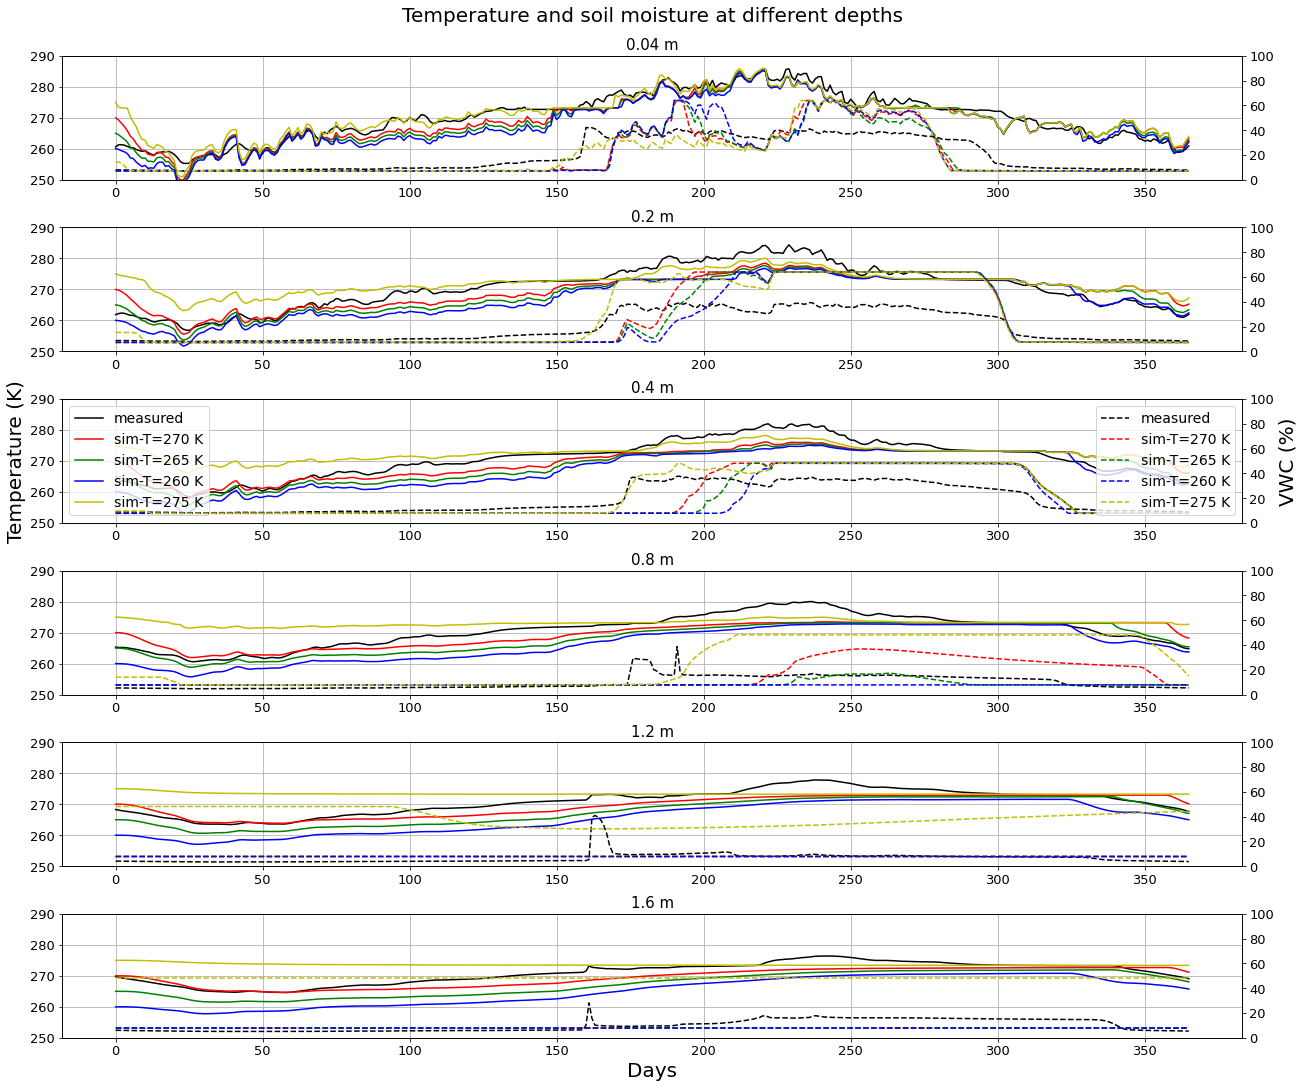

In [78]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,366)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2016'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT270_v[f'point -{depth} temperature [K]']['2016'].values, 'r', label='sim-T=270 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT265_v[f'point -{depth} temperature [K]']['2016'].values, 'g', label='sim-T=265 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT260_v[f'point -{depth} temperature [K]']['2016'].values, 'b', label='sim-T=260 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT275_v[f'point -{depth} temperature [K]']['2016'].values, 'y', label='sim-T=275 K')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2016'].values, 'k--', label='measured')
    ax2.plot(time_period, sim_data_IT270_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'r--', label='sim-T=270 K')
    ax2.plot(time_period, sim_data_IT265_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'g--', label='sim-T=265 K')
    ax2.plot(time_period, sim_data_IT260_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'b--', label='sim-T=260 K')
    ax2.plot(time_period, sim_data_IT275_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'y--', label='sim-T=275 K')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

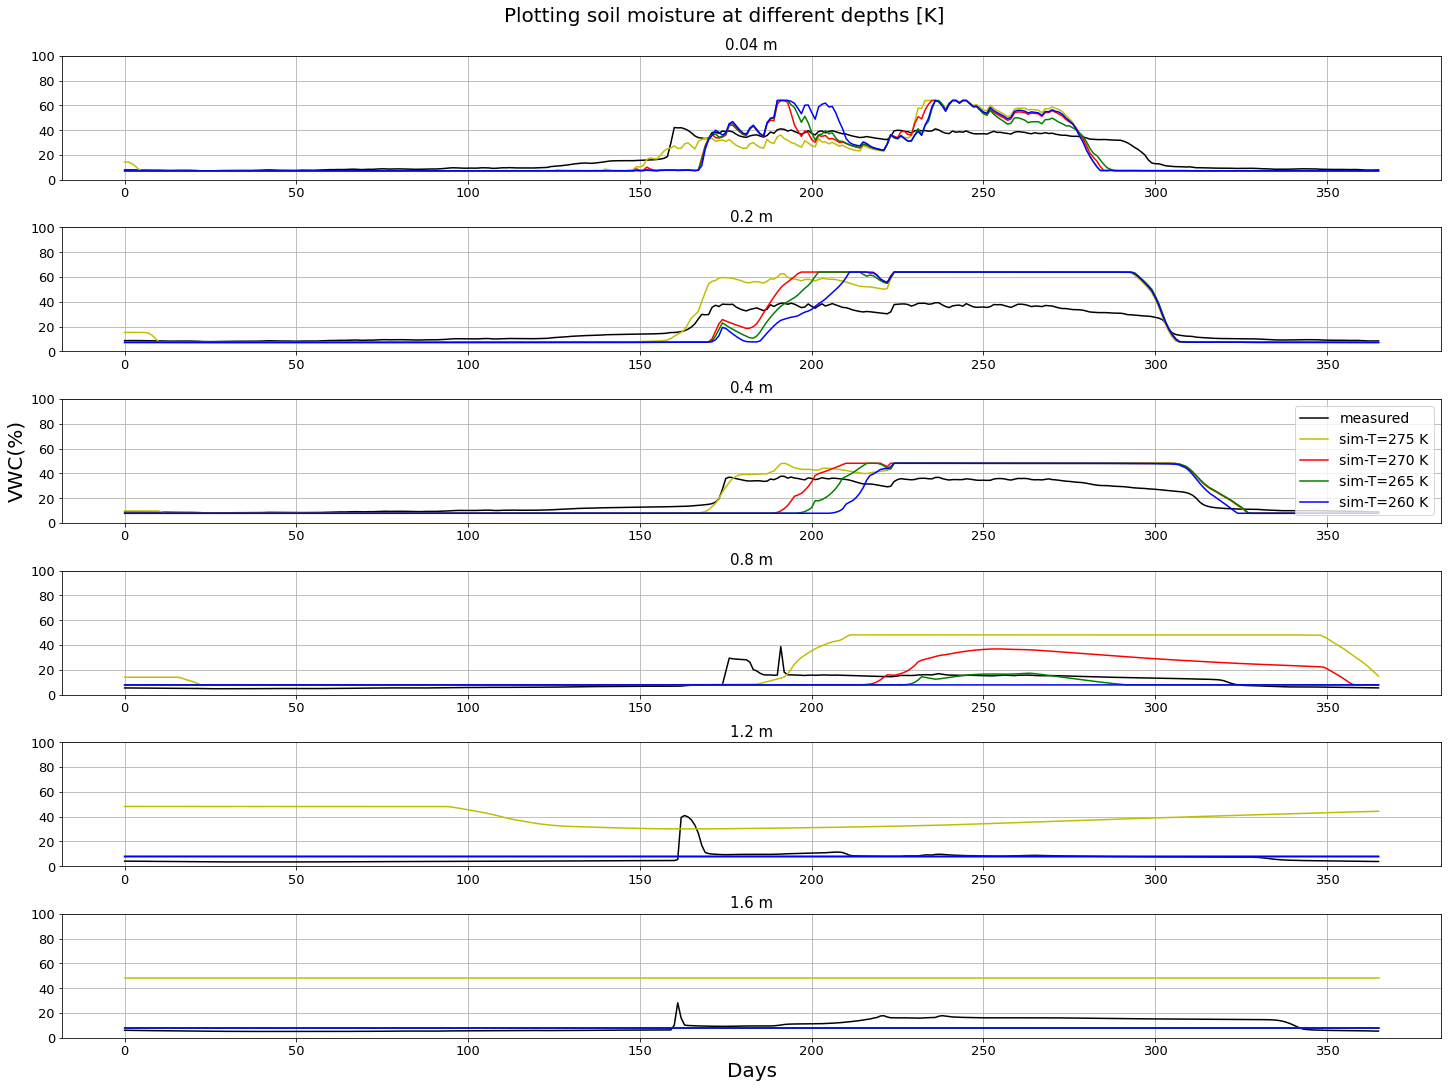

In [67]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,366)
time_period = np.arange(0,366)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2016'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT275_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'y', label='sim-T=275 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT270_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'r', label='sim-T=270 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT265_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'g', label='sim-T=265 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT260_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'b', label='sim-T=260 K')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    locals()['f2_ax'+str(j+1)].grid(True)


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('VWC(%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

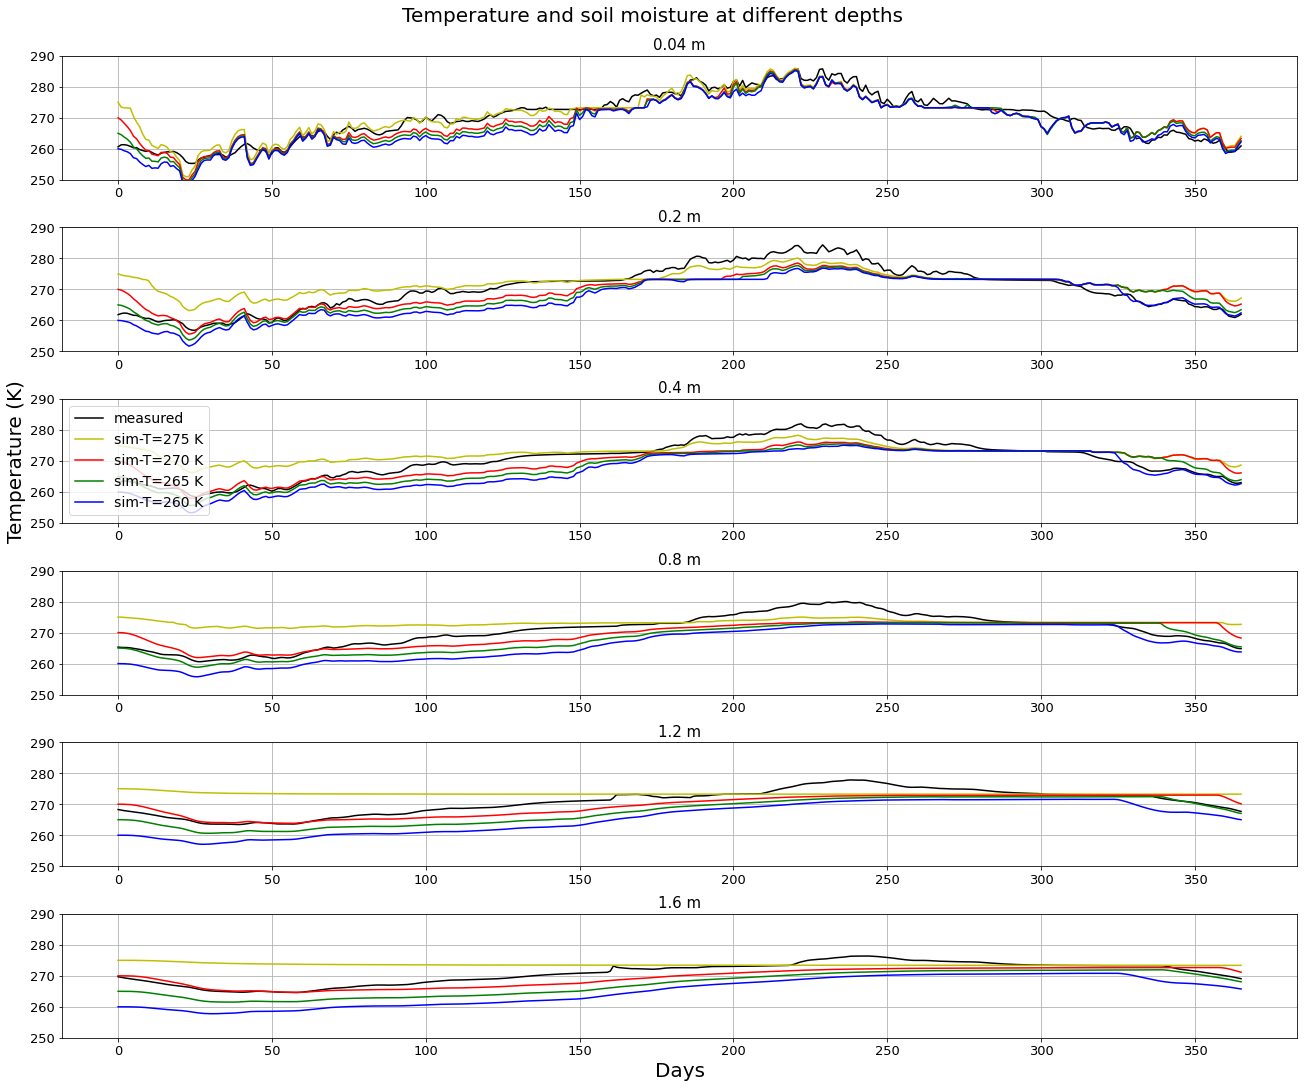

In [68]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,366)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2016'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT275_v[f'point -{depth} temperature [K]']['2016'].values, 'y', label='sim-T=275 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT270_v[f'point -{depth} temperature [K]']['2016'].values, 'r', label='sim-T=270 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT265_v[f'point -{depth} temperature [K]']['2016'].values, 'g', label='sim-T=265 K')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_IT260_v[f'point -{depth} temperature [K]']['2016'].values, 'b', label='sim-T=260 K')

    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

        

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)


f2_ax6.set_xlabel('Days', fontsize=20)

In [24]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

### Changing the initial Snow depth
- to check if the change in initial snow depth has an influence on the simulation results! - Simulating only for one year!

#### Comparing all the four results - 

In [69]:
# Storing the data in dataframes

sim_data_SD0 = pd.read_csv('Case5_InitialSD0.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_SD05 = pd.read_csv('Case5_InitialSD01.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_SD01 = pd.read_csv('Case5_InitialSD05.demo/observation.dat',skiprows=88,sep=' ') 
sim_data_SD1 = pd.read_csv('Case5_InitialSD1.demo/observation.dat',skiprows=88,sep=' ') 

# Considering simulation results after the initial condition (after the first value)

#sim_data_SD0 = sim_data_SD0[1:]
#sim_data_SD05 = sim_data_SD05[1:]
#sim_data_SD01 = sim_data_SD01[1:]
#sim_data_SD1 = sim_data_SD1[1:]

# Changing the index to time series
sim_data_SD0.index = Yakou_measured_data.loc['2016'].index
sim_data_SD05.index = Yakou_measured_data.loc['2016'].index
sim_data_SD01.index = Yakou_measured_data.loc['2016'].index
sim_data_SD1.index = Yakou_measured_data.loc['2016'].index

sim_data_SD0.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,0.0,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,0.113314,0.113314,0.113314,0.162504,0.162504,0.162504,0.162504
2016-01-02,86400.0,262.442659,263.331985,264.013244,264.477522,264.910266,264.988558,264.998083,0.113013,0.113105,0.113183,0.162503,0.162504,0.162504,0.162504
2016-01-03,172800.0,261.108352,262.297987,263.202492,263.883050,264.694576,264.930381,264.980781,0.112896,0.113000,0.113090,0.162503,0.162504,0.162504,0.162504
2016-01-04,259200.0,259.738129,261.194642,262.330022,263.225810,264.411843,264.830903,264.943841,0.112794,0.112903,0.113003,0.162503,0.162503,0.162504,0.162504
2016-01-05,345600.0,260.054636,261.076215,262.006828,262.841070,264.143582,264.705005,264.887545,0.112816,0.112893,0.112973,0.162502,0.162503,0.162504,0.162504


In [70]:
# Calculating the VWC
def vwc_calc(df):

    depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

    depth_peat = 0.3

    poro_peat = 0.63988208184177

    poro_mineral = 0.48172111121377

    for i, depth in enumerate(depths):
        if depth < depth_peat:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_peat*100)
        else:
            df[f'Soil moisture at - {depth} m (%)'] = df[f'point -{depth} saturation liquid']*(poro_mineral*100)
    
    return df

In [73]:
sim_data_SD0_v = vwc_calc(sim_data_WT10)
sim_data_SD05_v = vwc_calc(sim_data_SD05)
sim_data_SD01_v = vwc_calc(sim_data_SD01)
sim_data_SD1_v = vwc_calc(sim_data_SD1)

sim_data_WT10_v.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,...,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.114846,0.114846,...,0.162517,0.162517,0.162517,7.348796,7.348796,7.348796,7.828767,7.828767,7.828767,7.828767
2016-01-02,86400.0,269.439671,269.738723,269.928590,270.039569,270.132706,270.147950,270.149672,0.114454,0.114604,...,0.162516,0.162517,0.162517,7.323676,7.333292,7.340080,7.828732,7.828761,7.828766,7.828767
2016-01-03,172800.0,268.368121,269.004691,269.445360,269.738116,270.048886,270.128780,270.144410,0.114036,0.114265,...,0.162516,0.162516,0.162517,7.296976,7.311592,7.323848,7.828648,7.828735,7.828760,7.828765
2016-01-04,259200.0,267.280434,268.170824,268.839503,269.322413,269.903392,270.085817,270.130031,0.113736,0.113975,...,0.162515,0.162516,0.162516,7.277750,7.293026,7.307490,7.828555,7.828692,7.828746,7.828760
2016-01-05,345600.0,265.972329,267.164205,268.090670,268.789340,269.692506,270.012771,270.102096,0.113469,0.113709,...,0.162514,0.162516,0.162516,7.260701,7.276012,7.291487,7.828462,7.828637,7.828724,7.828751


Text(0.5, 0, 'Days')

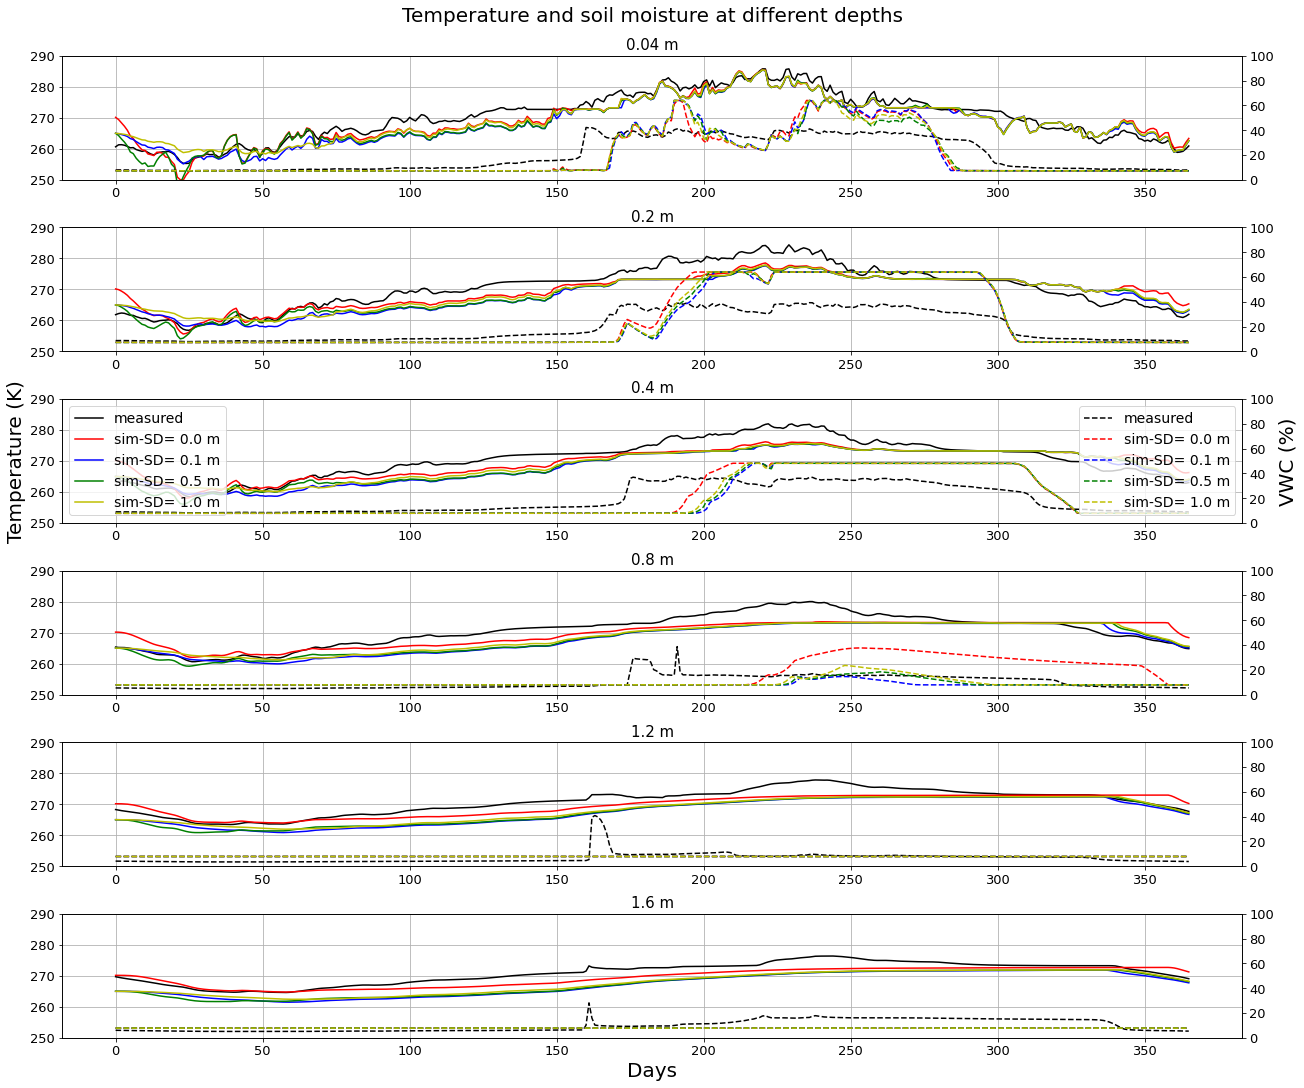

In [77]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,366)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)']['2016'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_SD0_v[f'point -{depth} temperature [K]']['2016'].values, 'r', label='sim-SD= 0.0 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_SD01_v[f'point -{depth} temperature [K]']['2016'].values, 'b', label='sim-SD= 0.1 m')
    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_SD05_v[f'point -{depth} temperature [K]']['2016'].values, 'g', label='sim-SD= 0.5 m')

    locals()['f2_ax'+str(j+1)].plot(time_period, sim_data_SD1_v[f'point -{depth} temperature [K]']['2016'].values, 'y', label='sim-SD= 1.0 m')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, Yakou_measured_data[f'Soil moisture at - {depth} m (%)']['2016'].values, 'k--', label='measured')
    ax2.plot(time_period, sim_data_WT10_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'r--', label='sim-SD= 0.0 m')
    ax2.plot(time_period, sim_data_SD01_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'b--', label='sim-SD= 0.1 m')
    ax2.plot(time_period, sim_data_SD05_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'g--', label='sim-SD= 0.5 m')

    ax2.plot(time_period, sim_data_SD1_v[f'Soil moisture at - {depth} m (%)']['2016'].values, 'y--', label='sim-SD= 1.0 m')

    #ax2.plot(time_period, mois_measured[x:x+365].values, 'k--', label=f'measured')
    #ax2.plot(time_period, mois_sim_1[x:x+365].values, 'r--', label=f'M-Case 1')
    #ax2.plot(time_period, mois_sim_2[x:x+365].values, 'b--', label=f'M-Case 2')
    #x2.plot(time_period, mois_sim_3[x:x+365].values, 'y--', label=f'M-Case 2_1')
    #ax2.plot(time_period, mois_sim_4[x:x+365].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

In [24]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

##### 